# Step 2a: Data Cleaning, Pt. 2

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

## A. Grocery Market Data

In [4]:
usda_df = pd.read_csv('cleaned_usda_data.csv')

usda_df.head()

,issuing_office,report_date,program,level_1,level_2,organic,specialty,unit,region,weighted_average_price,price_low,price_high
0,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NO,NO,NaN,NORTHEAST U.S.,NaN,NaN,NaN
1,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NO,NO,NaN,NORTHEAST U.S.,NaN,NaN,NaN
2,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NO,NO,NaN,NATIONAL,NaN,NaN,NaN
3,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NO,NO,NaN,NATIONAL,NaN,NaN,NaN
4,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NO,NO,NaN,ALASKA,NaN,NaN,NaN


In [5]:
# What's going on in level_2 re: NaN%?

nan_percentage = usda_df['level_2'].isna().sum() / len(usda_df['level_2']) * 100
print(nan_percentage)


8.058644049437694


### i. A deep dive on the organic column

In [6]:
# What about in organic? 

nan_percentage = usda_df['organic'].isna().sum() / len(usda_df['organic']) * 100
print(nan_percentage)


56.39868954924173


In [7]:
# What all's in organic?

usda_df['organic'].unique()

array(['NO', 'YES', nan], dtype=object)

In [8]:
# How much is 'YES' (i.e. organic)

organic_pct = (usda_df['organic'] == 'YES').sum() / len(usda_df['organic']) * 100
print(organic_pct)

3.4316235495295078


In [9]:
# Are the products marked 'YES' for organic labeled any differently in other columns?  What types of products are they?

organic_df = usda_df[usda_df['organic'] == 'YES']

organic_df.head()

,issuing_office,report_date,program,level_1,level_2,organic,specialty,unit,region,weighted_average_price,price_low,price_high
58,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,YES,NO,NaN,ALASKA,NaN,NaN,NaN
64,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,YES,NO,NaN,SOUTHWEST U.S.,NaN,NaN,NaN
65,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,YES,NO,NaN,SOUTHWEST U.S.,NaN,NaN,NaN
66,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,YES,NO,NaN,MIDWEST U.S.,NaN,NaN,NaN
67,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,YES,NO,NaN,MIDWEST U.S.,NaN,NaN,NaN


In [10]:
# Do any of my other dataframes have data on organic products, specifically? 

bls_df = pd.read_csv('cleaned_bls_cpi_data.csv')
costco_df = pd.read_csv('cleaned_costco_data.csv')

In [11]:
bls_df.head()

,product,unadjusted_percent_change_2024,seasonally_adjusted_effect_2024,unadjusted_effect_2024
0,All items,2.9,NaN,NaN
1,Food,2.5,0.042,0.340
2,Food at home,1.8,0.026,0.145
3,Cereals and bakery products,0.8,0.012,0.008
4,Cereals and cereal products,1.7,0.004,0.005


In [12]:
# Any organic products in this table? 

bls_organic_filtered_df = bls_df[bls_df['product'].str.contains('organic', case=False, na=False)]

bls_organic_filtered_df.head()

# Apparently not. 

,product,unadjusted_percent_change_2024,seasonally_adjusted_effect_2024,unadjusted_effect_2024


In [13]:
costco_df.head()

,sub_category,price,title
0,Bakery & Desserts,56.99,"David’s Cookies Mile High Peanut Butter Cake, ..."
1,Bakery & Desserts,159.99,"The Cake Bake Shop 8"" Round Carrot Cake (16-22..."
2,Bakery & Desserts,44.99,"St Michel Madeleine, Classic French Sponge Cak..."
3,Bakery & Desserts,39.99,"David's Cookies Butter Pecan Meltaways 32 oz, ..."
4,Bakery & Desserts,59.99,"David’s Cookies Premier Chocolate Cake, 7.2 lb..."


In [14]:
# Any organic products in this table?

costco_organic_filtered_df = costco_df[
    costco_df['sub_category'].str.contains('organic', case=False, na=False) | 
    costco_df['title'].str.contains('organic', case=False, na=False)
]

costco_organic_filtered_df.head()

# Okay, so there ARE organic products in the costco_df...

,sub_category,price,title
35,Beverages & Water,9.99,"Kirkland Signature, Organic Almond Beverage, V..."
37,Beverages & Water,21.99,"Kirkland Signature, Organic Reduced Fat Chocol..."
46,Beverages & Water,12.99,"SO Delicious, Organic Coconut Milk, 32 oz, 6-C..."
52,Beverages & Water,21.99,"Kirkland Signature, Organic Coconut Water, 33...."
57,Beverages & Water,21.99,"Horizon, Organic Whole Milk, 8 oz, 18-Count"


In [15]:
# What % of the products in the costco_df are organic?

organic_pct = costco_df['title'].str.contains('organic', case=False, na=False).sum() / len(costco_df['title']) * 100

print(organic_pct)

8.487084870848708


### ii. A deep dive on the specialty column

In [16]:
usda_df['specialty'].unique()

array(['NO ', 'YES', nan], dtype=object)

In [17]:
# What % of specialty is Nan?

nan_percentage = usda_df['specialty'].isna().sum() / len(usda_df['specialty']) * 100
print(nan_percentage)

58.29050461583623


In [18]:
# What % of specialty is 'YES'

specialty_pct = (usda_df['specialty'] == 'YES').sum() / len(usda_df['specialty']) * 100
print(specialty_pct)

7.078459441625943


In [19]:
# What kinds of products are listed as specialty? 

specialty_df = usda_df[usda_df['specialty'] == 'YES']

specialty_df.head()

,issuing_office,report_date,program,level_1,level_2,organic,specialty,unit,region,weighted_average_price,price_low,price_high
52,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,NO,YES,NaN,HAWAII,NaN,NaN,NaN
53,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,NO,YES,NaN,HAWAII,NaN,NaN,NaN
59,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,NO,YES,NaN,ALASKA,NaN,NaN,NaN
74,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,NO,YES,NaN,NORTHWEST U.S.,NaN,NaN,NaN
75,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,NO,YES,NaN,NORTHWEST U.S.,NaN,NaN,NaN


### Takeaways: 
* I think I should filter everything marked as 'organic', which is 8.49%, from the usda_df.
* I think I should filter everything marked as 'specialty', which is 7.08%, from the usda_df.
* I think I should then drop the organic and specialty columns. 

In [20]:
# Filtering out organic & specialty 'YES'

usda_df = usda_df[(usda_df['organic'] != 'YES') & (usda_df['specialty'] != 'YES')]

usda_df.head()

,issuing_office,report_date,program,level_1,level_2,organic,specialty,unit,region,weighted_average_price,price_low,price_high
0,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NO,NO,NaN,NORTHEAST U.S.,NaN,NaN,NaN
1,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NO,NO,NaN,NORTHEAST U.S.,NaN,NaN,NaN
2,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NO,NO,NaN,NATIONAL,NaN,NaN,NaN
3,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NO,NO,NaN,NATIONAL,NaN,NaN,NaN
4,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NO,NO,NaN,ALASKA,NaN,NaN,NaN


In [21]:
# Dropping now-useless organic & specialty columns

usda_df.drop(columns=['organic', 'specialty'], axis=1, inplace=True)

usda_df.head()

,issuing_office,report_date,program,level_1,level_2,unit,region,weighted_average_price,price_low,price_high
0,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NaN,NORTHEAST U.S.,NaN,NaN,NaN
1,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NaN,NORTHEAST U.S.,NaN,NaN,NaN
2,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NaN,NATIONAL,NaN,NaN,NaN
3,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NaN,NATIONAL,NaN,NaN,NaN
4,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NaN,ALASKA,NaN,NaN,NaN


### iii. The level_2 column

In [22]:
# What % is NaN?

nan_percentage = usda_df['level_2'].isna().sum() / len(usda_df['level_2']) * 100
print(nan_percentage)

6.819216736542158


In [23]:
# Should I filter out everythign that's Nan here?

usda_df['level_2'].unique()

# I actually think this information is necessary enough that it might be a good idea to filter out NaNs

array([nan, 'PREPARED', 'FRESH/FROZEN/PREPARED', 'FRESH', 'FROZEN',
       'FRESH/FROZEN', 'FILET MIGNON', 'TENDERLOIN', 'FLANK STEAK',
       'PORTERHOUSE STEAK', 'BNLS RIBEYE STEAK',
       'BNLS NEW YORK STRIP STEAK', 'BNLS RIBEYE ROAST',
       'BONE-IN STRIP STEAK', 'BONE-IN RIBEYE STEAK',
       'BNLS TOP SIRLOIN STEAK', 'SKIRT STEAK', 'BNLS SIRLOIN STEAK',
       'BRISKET, FLAT', 'T-BONE STEAK', 'LOIN, BNLS', 'BEEF SHORT RIBS',
       'TOP ROUND STEAK', 'BNLS TOP SIRLOIN ROAST', 'SIRLOIN STEAK',
       'MINUTE/CUBE STEAKS', 'SIRLOIN TIP STEAK', 'EYE OF ROUND STEAK',
       'STEW MEAT', 'TRI-TIP', 'TOP ROUND ROAST', 'BEEF PATTIES',
       'BOTTOM ROUND ROAST', 'SIRLOIN TIP ROAST', 'LONDON BROIL',
       'EYE OF ROUND ROAST', 'GROUND SIRLOIN', 'GROUND BEEF 90% OR MORE',
       'CHUCK/SHLDR/ARM ROAST', 'BOTTOM ROUND STEAK',
       'CHUCK/SHLDR/ARM STEAK', 'RUMP ROAST', 'GROUND ROUND', 'BRISKET',
       'BEEF BACKRIBS', 'GROUND BEEF 80-89%', 'GROUND CHUCK',
       'GROUND BEEF 70-79

In [24]:
# For example, what kind of eggs are listed that don't have any level_2 information?

eggs_check_df = usda_df[(usda_df['level_1'].str.lower() == 'eggs') & (usda_df['level_2'].isna())]

eggs_check_df.head()

,issuing_office,report_date,program,level_1,level_2,unit,region,weighted_average_price,price_low,price_high
0,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NaN,NORTHEAST U.S.,NaN,NaN,NaN
1,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NaN,NORTHEAST U.S.,NaN,NaN,NaN
2,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NaN,NATIONAL,NaN,NaN,NaN
3,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NaN,NATIONAL,NaN,NaN,NaN
4,"DES MOINES, IA",2024-08-30,POULTRY,EGGS,NaN,NaN,ALASKA,NaN,NaN,NaN


In [25]:
# I think it makes the most sense to filter out rows with level_2 NaN 

usda_df = usda_df[~usda_df['level_2'].isna()]

usda_df.head()

,issuing_office,report_date,program,level_1,level_2,unit,region,weighted_average_price,price_low,price_high
28,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,NaN,HAWAII,NaN,NaN,NaN
29,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,NaN,HAWAII,NaN,NaN,NaN
30,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,FRESH/FROZEN/PREPARED,NaN,HAWAII,NaN,NaN,NaN
31,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,FRESH/FROZEN/PREPARED,NaN,HAWAII,NaN,NaN,NaN
32,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,NaN,ALASKA,NaN,NaN,NaN


### iv. The unit column

In [26]:
nan_percentage = usda_df['unit'].isna().sum() / len(usda_df['unit']) * 100
print(nan_percentage)

6.678188798372739


In [27]:
# Probably helpful to only have products listed where some information is also given about how they're packaged / sold
# so that I can correctly compare to other datasets.

usda_df = usda_df[~usda_df['unit'].isna()]

usda_df.head()

,issuing_office,report_date,program,level_1,level_2,unit,region,weighted_average_price,price_low,price_high
167,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,16 OUNCES,HAWAII,7.12,7.12,7.12
168,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,7-10 OUNCES,HAWAII,4.99,4.99,4.99
170,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,16 OUNCES,ALASKA,6.96,4.99,9.49
171,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,7-10 OUNCES,ALASKA,3.48,3.48,3.48
172,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,16 OUNCES,NORTHWEST U.S.,7.11,6.99,7.12


### v. The region column

In [28]:
# Do all products have region data?

nan_percentage = usda_df['region'].isna().sum() / len(usda_df['region']) * 100
print(nan_percentage)

# Answer: yes, they do. 

0.0


### vi. The weighted_average_price column

In [29]:
# Do all products have a weighted average price?

nan_percentage = usda_df['weighted_average_price'].isna().sum() / len(usda_df['weighted_average_price']) * 100
print(nan_percentage)

1.6472469972746298e-05


In [30]:
# Think it makes sense to get rid of anything that doesn't have a weighted average price, as that's what i'll
# probably most heavily rely on for analysis... 

usda_df = usda_df[~usda_df['weighted_average_price'].isna()]

usda_df.head()

,issuing_office,report_date,program,level_1,level_2,unit,region,weighted_average_price,price_low,price_high
167,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,16 OUNCES,HAWAII,7.12,7.12,7.12
168,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,7-10 OUNCES,HAWAII,4.99,4.99,4.99
170,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,16 OUNCES,ALASKA,6.96,4.99,9.49
171,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,7-10 OUNCES,ALASKA,3.48,3.48,3.48
172,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,16 OUNCES,NORTHWEST U.S.,7.11,6.99,7.12


In [31]:
# Do either the price_low or price_high columns have any NaNs? 

nan_low_pct = usda_df['price_low'].isna().sum() / len(usda_df['price_low']) * 100
print(nan_low_pct)

nan_high_pct = usda_df['price_high'].isna().sum() / len(usda_df['price_high']) * 100
print(nan_high_pct)

# Seems weird that those are exactly the same... 

24.299911674601457
24.299911674601457


In [32]:
price_check_df = usda_df[(usda_df['price_low'].isna())]

price_check_df.head(100)

# It appears that the reason the Nan %s for price_low and price_high are exactly the same is that if a product doesn't
# have data for one, it won't have it for the other, either. 

,issuing_office,report_date,program,level_1,level_2,unit,region,weighted_average_price,price_low,price_high
260,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,16 OUNCES,NATIONAL,6.94,NaN,NaN
261,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,7-10 OUNCES,NATIONAL,4.96,NaN,NaN
262,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,7-10 OUNCES,NATIONAL,4.36,NaN,NaN
263,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,,NATIONAL,6.99,NaN,NaN
264,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,,NATIONAL,4.29,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
474,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,TRAY REGULAR,MIDWEST U.S.,9.28,NaN,NaN
475,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,TRAY VALUE,MIDWEST U.S.,3.56,NaN,NaN
476,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,TRAY REGULAR,MIDWEST U.S.,4.17,NaN,NaN
477,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,TRAY,MIDWEST U.S.,3.99,NaN,NaN


In [33]:
# Off-topic, but I'm seeing what appear to be empty cells in the unit column.  Does this fix it? 

usda_df = usda_df[(usda_df['unit'].str.strip() != '')]

usda_df.head()

# Appears to... 

,issuing_office,report_date,program,level_1,level_2,unit,region,weighted_average_price,price_low,price_high
167,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,16 OUNCES,HAWAII,7.12,7.12,7.12
168,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,7-10 OUNCES,HAWAII,4.99,4.99,4.99
170,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,16 OUNCES,ALASKA,6.96,4.99,9.49
171,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,7-10 OUNCES,ALASKA,3.48,3.48,3.48
172,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,16 OUNCES,NORTHWEST U.S.,7.11,6.99,7.12


In [34]:
# Okay... back to price_low / price_high... 

price_check_df = usda_df[(usda_df['price_low'].isna())]

price_check_df.head(100)

,issuing_office,report_date,program,level_1,level_2,unit,region,weighted_average_price,price_low,price_high
260,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,16 OUNCES,NATIONAL,6.94,NaN,NaN
261,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,7-10 OUNCES,NATIONAL,4.96,NaN,NaN
262,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,7-10 OUNCES,NATIONAL,4.36,NaN,NaN
275,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,FRESH,TRAY,NATIONAL,5.99,NaN,NaN
276,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,FRESH,TRAY,NATIONAL,4.82,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
499,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,TRAY VALUE,SOUTHEAST U.S.,2.19,NaN,NaN
500,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,TRAY REGULAR,SOUTHEAST U.S.,3.36,NaN,NaN
501,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FRESH,TRAY REGULAR,SOUTHEAST U.S.,2.80,NaN,NaN
504,"DES MOINES, IA",2024-08-30,POULTRY,CHICKEN,FROZEN,BAGGED,NORTHEAST U.S.,2.49,NaN,NaN


In [35]:
# Honestly, I think a weighted average is fine data for this analysis.  I'll drop the other 2.as_integer_ratio

usda_df.drop(columns=['price_low', 'price_high'], axis=1, inplace=True)

usda_df.head()

,issuing_office,report_date,program,level_1,level_2,unit,region,weighted_average_price
167,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,16 OUNCES,HAWAII,7.12
168,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,7-10 OUNCES,HAWAII,4.99
170,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,16 OUNCES,ALASKA,6.96
171,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,7-10 OUNCES,ALASKA,3.48
172,"DES MOINES, IA",2024-08-30,POULTRY,TURKEY,PREPARED,16 OUNCES,NORTHWEST U.S.,7.11


### vii. The regions column, revisted

In [36]:
# How many different regions are listed?

usda_df['region'].nunique()

# 9?  That's actually really manageable.  *thumbs up*

9

### viii. The report_date column, revisted

In [37]:
# What are the earliest and latest dates in this dataset, again? 

usda_df['report_date'] = pd.to_datetime(usda_df['report_date'])
earleist_date = usda_df['report_date'].min()
latest_date = usda_df['report_date'].max()

print(earleist_date)
print(latest_date)


2020-01-03 00:00:00
2024-08-30 00:00:00


In [38]:
# How many times does each date show up (i.e. are we getting consistent amounts data over time?)

date_counts = usda_df['report_date'].value_counts()

print(date_counts)

# It looks like some dates are *way* more frequently represented than others.  

report_date
2021-01-22    59629
2021-03-12    58017
2020-02-14    56889
2020-02-07    56514
2020-02-28    56372
              ...  
2024-08-16     5731
2024-08-23     4905
2021-01-20     4900
2021-01-11     4459
2024-08-30     3920
Name: count, Length: 251, dtype: int64


In [39]:
# Let's get a better idea what's going on with the freqeucny of reports

usda_df['report_date'].value_counts().describe()

count      251.000000
mean     43572.649402
std      12885.954704
min       3920.000000
25%      42245.500000
50%      48647.000000
75%      50809.500000
max      59629.000000
Name: count, dtype: float64

Text(0.5, 0, 'Number of Reports Per Date')

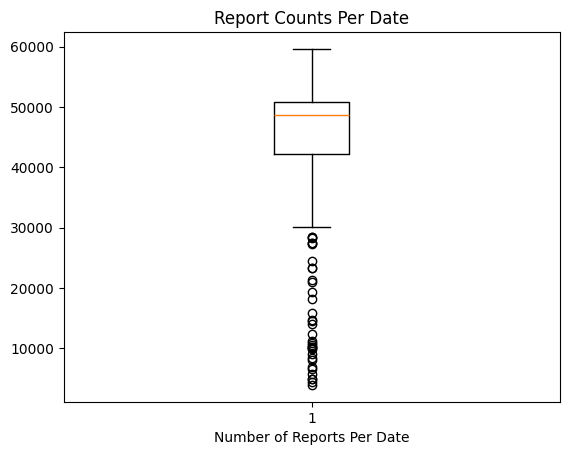

In [40]:
# Let's visualize that

plt.boxplot(date_counts)
plt.title('Report Counts Per Date')
plt.xlabel('Number of Reports Per Date')

# It appears that dates with fewer than 30,000 reports are uncommon, and should perhaps be treated
# as outliers.

In [44]:
# Get the IQR 

Q1 = date_counts.quantile(0.25)
Q3 = date_counts.quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

high_outliers = date_counts[date_counts < lower_bound].index
low_outliers = date_counts[date_counts > upper_bound].index

print(lower_bound)
print(upper_bound)

# Okay, so anything with less than 29,399.5 reports is a low outlier, and anything with more than 63,655.5 reports
# is a high outlier.  


29399.5
63655.5


In [ ]:
# Filter out outliers 

usda_df = usda_df[~usda_df['report_date'].isin(low_outliers) & ~usda_df['report_date'].isin(high_outliers)]

usda_df.head() 

,issuing_office,report_date,program,level_1,level_2,unit,region,weighted_average_price
648829,"DES MOINES, IA",2024-02-16,POULTRY,TURKEY,PREPARED,16 OUNCES,ALASKA,9.49
648830,"DES MOINES, IA",2024-02-16,POULTRY,TURKEY,PREPARED,7-10 OUNCES,ALASKA,4.29
648832,"DES MOINES, IA",2024-02-16,POULTRY,TURKEY,PREPARED,16 OUNCES,NORTHWEST U.S.,7.28
648834,"DES MOINES, IA",2024-02-16,POULTRY,TURKEY,FRESH,TRAY,NORTHWEST U.S.,2.99
648835,"DES MOINES, IA",2024-02-16,POULTRY,TURKEY,PREPARED,16 OUNCES,SOUTHWEST U.S.,3.99


Text(0.5, 0, 'Number of Reports Per Date')

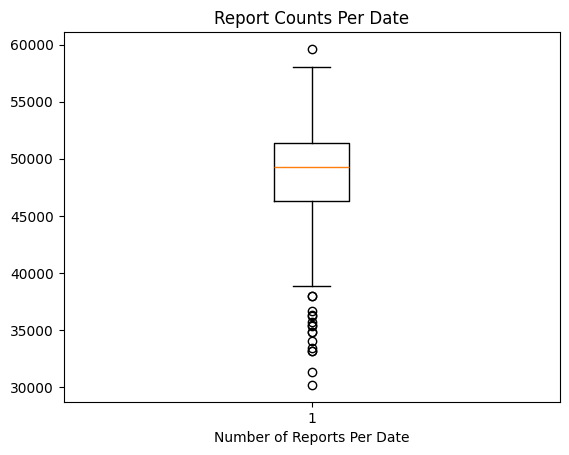

In [46]:
# Re-visualize without outliers

date_counts = usda_df['report_date'].value_counts()

plt.boxplot(date_counts)
plt.title('Report Counts Per Date')
plt.xlabel('Number of Reports Per Date')

In [47]:
# That viz still looks like it has a lot of outliers... 

# Run IQR again 

Q1 = date_counts.quantile(0.25)
Q3 = date_counts.quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

high_outliers = date_counts[date_counts < lower_bound].index
low_outliers = date_counts[date_counts > upper_bound].index

print(lower_bound)
print(upper_bound)

38651.25
58997.25


In [48]:
# Filter out outliers again

usda_df = usda_df[~usda_df['report_date'].isin(low_outliers) & ~usda_df['report_date'].isin(high_outliers)]

usda_df.head() 

,issuing_office,report_date,program,level_1,level_2,unit,region,weighted_average_price
979302,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FROZEN,BAGGED,NORTHWEST U.S.,3.92
979303,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FRESH,TRAY VALUE,NORTHWEST U.S.,2.99
979304,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FRESH,TRAY VALUE,NORTHWEST U.S.,1.29
979305,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FRESH,TRAY REGULAR,NORTHWEST U.S.,1.29
979306,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FRESH,TRAY VALUE,NORTHWEST U.S.,1.69


Text(0.5, 0, 'Number of Reports Per Date')

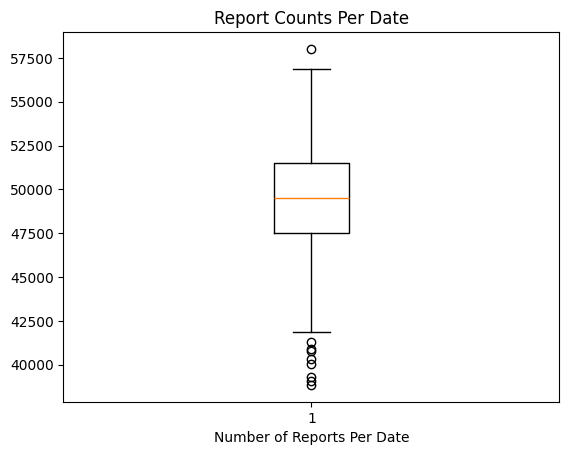

In [ ]:
# Vsualize again

date_counts = usda_df['report_date'].value_counts()

plt.boxplot(date_counts)
plt.title('Report Counts Per Date')
plt.xlabel('Number of Reports Per Date')

# I guess that looks better... 


### ix. The issuing_office column

In [ ]:
# Do offices report at a fairly even distribution? 

usda_df['issuing_office'].value_counts()

issuing_office
DES MOINES, IA     5123115
ST JOSEPH, MO      4534983
IDAHO FALLS, CA     137004
Name: count, dtype: int64

### Takeaways:
* Do I need data from 3 different offices?  It's not like I'm trying to compare reporting trends FROM those 3 offices?
* The way the products are currently listed is... unhelpful.  I think I need to abe able to make ONE 'product' column and then be able to aggregate data based on those product names...

### x. Concatenate product names

In [52]:
usda_df.head()

,issuing_office,report_date,program,level_1,level_2,unit,region,weighted_average_price
979302,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FROZEN,BAGGED,NORTHWEST U.S.,3.92
979303,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FRESH,TRAY VALUE,NORTHWEST U.S.,2.99
979304,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FRESH,TRAY VALUE,NORTHWEST U.S.,1.29
979305,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FRESH,TRAY REGULAR,NORTHWEST U.S.,1.29
979306,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FRESH,TRAY VALUE,NORTHWEST U.S.,1.69


In [ ]:
# Create new product column by concatenating the 3 columns currently containing product information

usda_df['product_name'] = usda_df['level_1'] + ' ' + usda_df['level_2'] + ' ' + usda_df['unit']

usda_df.head()

,issuing_office,report_date,program,level_1,level_2,unit,region,weighted_average_price,product_name
979302,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FROZEN,BAGGED,NORTHWEST U.S.,3.92,CHICKEN FROZEN BAGGED
979303,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FRESH,TRAY VALUE,NORTHWEST U.S.,2.99,CHICKEN FRESH TRAY VALUE
979304,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FRESH,TRAY VALUE,NORTHWEST U.S.,1.29,CHICKEN FRESH TRAY VALUE
979305,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FRESH,TRAY REGULAR,NORTHWEST U.S.,1.29,CHICKEN FRESH TRAY REGULAR
979306,"DES MOINES, IA",2023-12-29,POULTRY,CHICKEN,FRESH,TRAY VALUE,NORTHWEST U.S.,1.69,CHICKEN FRESH TRAY VALUE


In [56]:
# Drop the 3 original columns separately containing product information

usda_df.drop(columns=['level_1', 'level_2', 'unit'], axis=1, inplace=True)

usda_df.head()

,issuing_office,report_date,program,region,weighted_average_price,product_name
979302,"DES MOINES, IA",2023-12-29,POULTRY,NORTHWEST U.S.,3.92,CHICKEN FROZEN BAGGED
979303,"DES MOINES, IA",2023-12-29,POULTRY,NORTHWEST U.S.,2.99,CHICKEN FRESH TRAY VALUE
979304,"DES MOINES, IA",2023-12-29,POULTRY,NORTHWEST U.S.,1.29,CHICKEN FRESH TRAY VALUE
979305,"DES MOINES, IA",2023-12-29,POULTRY,NORTHWEST U.S.,1.29,CHICKEN FRESH TRAY REGULAR
979306,"DES MOINES, IA",2023-12-29,POULTRY,NORTHWEST U.S.,1.69,CHICKEN FRESH TRAY VALUE


### xi. More drops

In [57]:
# After further thought, I don't think the issuing_office or program columns are of any value

usda_df.drop(columns=['issuing_office', 'program'], axis=1, inplace=True)

usda_df.head()

,report_date,region,weighted_average_price,product_name
979302,2023-12-29,NORTHWEST U.S.,3.92,CHICKEN FROZEN BAGGED
979303,2023-12-29,NORTHWEST U.S.,2.99,CHICKEN FRESH TRAY VALUE
979304,2023-12-29,NORTHWEST U.S.,1.29,CHICKEN FRESH TRAY VALUE
979305,2023-12-29,NORTHWEST U.S.,1.29,CHICKEN FRESH TRAY REGULAR
979306,2023-12-29,NORTHWEST U.S.,1.69,CHICKEN FRESH TRAY VALUE


### xii. Reorder columns more usefully

In [58]:
column_order = ['product_name', 'weighted_average_price', 'region', 'report_date']

usda_df = usda_df[column_order]

usda_df.head()

,product_name,weighted_average_price,region,report_date
979302,CHICKEN FROZEN BAGGED,3.92,NORTHWEST U.S.,2023-12-29
979303,CHICKEN FRESH TRAY VALUE,2.99,NORTHWEST U.S.,2023-12-29
979304,CHICKEN FRESH TRAY VALUE,1.29,NORTHWEST U.S.,2023-12-29
979305,CHICKEN FRESH TRAY REGULAR,1.29,NORTHWEST U.S.,2023-12-29
979306,CHICKEN FRESH TRAY VALUE,1.69,NORTHWEST U.S.,2023-12-29


### xiii. Group and aggregate to get more useful price data

In [71]:
usda_df_grouped = (
    usda_df.groupby(['product_name', 'region', 'report_date'])['weighted_average_price']
    .mean()
    .reset_index()
    .rename(columns = {'weighted_average_price' : 'mean_weighted_price'})
)

usda_df_grouped.head()

,product_name,region,report_date,mean_weighted_price
0,APPLES BRAEBURN 2 lb bag,MIDWEST U.S.,2021-03-19,3.49
1,APPLES BRAEBURN 2 lb bag,NATIONAL,2020-02-21,0.99
2,APPLES BRAEBURN 2 lb bag,NATIONAL,2021-03-19,3.49
3,APPLES BRAEBURN 2 lb bag,SOUTHWEST U.S.,2020-02-21,0.99
4,APPLES BRAEBURN 3 lb bag,HAWAII,2021-11-26,5.99


In [ ]:
# Alright, now how much data am I working with here? 

usda_df_grouped.shape

# 260,636 rows, eh?  Not exactly... manageable (at least to me)...

(260636, 4)

In [ ]:
# What years are in this dataset?

usda_df_grouped["report_date"] = pd.to_datetime(usda_df_grouped["report_date"])

usda_df_grouped["year"] = usda_df_grouped["report_date"].dt.year
unique_years = usda_df_grouped["year"].unique()
print(unique_years)

[2021 2020 2022 2023]


### xiv. Filter to 2023 to match other datasets

In [79]:
# Ensure usable datetime format
usda_df_grouped["report_date"] = pd.to_datetime(usda_df_grouped["report_date"])

# Filter out all but 2023
usda_df_2024 = usda_df_grouped[usda_df_grouped["report_date"].dt.year == 2023]

usda_df_2024.head(0)

usda_df_2024.shape

(57935, 5)

## 2. Inflation Trend Data

In [91]:
# Import 2023 BLS CPI dataset (instead of previously-used 2024 dataset)

bls_df = pd.read_excel('cpi-u-202312.xlsx')

In [92]:
# Get a feel for what's going on

bls_df.head()

,Expenditure category,Relative\nimportance\nNov.\n2023,Unadjusted indexes,Unadjusted indexes.1,Unadjusted indexes.2,Unadjusted indexes.3,Unadjusted indexes.4,Unadjusted indexes.5,Unadjusted indexes.6,Unadjusted indexes.7,...,Seasonally adjusted percent change.1,Seasonally adjusted percent change.2,One Month,One Month.1,One Month.2,One Month.3,Twelve Month,Twelve Month.1,Twelve Month.2,Twelve Month.3
0,NaN,NaN,Dec.\n2022,Jan.\n2023,Feb.\n2023,Mar.\n2023,Apr.\n2023,May\n2023,Jun.\n2023,Jul.\n2023,...,Oct.\n2023-\nNov.\n2023,Nov.\n2023-\nDec.\n2023,Seasonally adjusted effect on All Items\nNov. ...,"Standard error, median price change(2)",Largest (L) or Smallest (S) seasonally adjuste...,Largest (L) or Smallest (S) seasonally adjuste...,Unadjusted effect on All Items\nDec. 2022-\nDe...,"Standard error, median price change(2)",Largest (L) or Smallest (S) unadjusted change ...,Largest (L) or Smallest (S) unadjusted change ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Date,Percent change,NaN,NaN,Date,Percent change
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All items,100.000,296.797,299.17,300.84,301.836,303.363,304.127,305.109,305.691,...,0.1,0.3,NaN,0.04,L-Sep. 2023,0.4,NaN,0.12,L-Sep. 2023,3.7
4,Food,13.424,316.839,319.136,320.569,320.863,321.566,322.249,322.556,323.523,...,0.2,0.2,0.028,0.09,–,–,0.366,0.19,S-Jun. 2021,2.4


### i. Run all the code previously run on the 2024 dataset to clean

In [93]:
# Get rid of indexes.  Will just use summary data.

indexes = bls_df.columns[bls_df.columns.str.contains('index', case=False)]

bls_df.drop(columns=indexes, axis=1, inplace=True)

bls_df.head()

,Expenditure category,Relative\nimportance\nNov.\n2023,Unadjusted percent change,Unadjusted percent change.1,Unadjusted percent change.2,Unadjusted percent change.3,Seasonally adjusted percent change,Seasonally adjusted percent change.1,Seasonally adjusted percent change.2,One Month,One Month.1,One Month.2,One Month.3,Twelve Month,Twelve Month.1,Twelve Month.2,Twelve Month.3
0,NaN,NaN,Dec.\n2022-\nDec.\n2023,Sep.\n2023-\nOct.\n2023,Oct.\n2023-\nNov.\n2023,Nov.\n2023-\nDec.\n2023,Sep.\n2023-\nOct.\n2023,Oct.\n2023-\nNov.\n2023,Nov.\n2023-\nDec.\n2023,Seasonally adjusted effect on All Items\nNov. ...,"Standard error, median price change(2)",Largest (L) or Smallest (S) seasonally adjuste...,Largest (L) or Smallest (S) seasonally adjuste...,Unadjusted effect on All Items\nDec. 2022-\nDe...,"Standard error, median price change(2)",Largest (L) or Smallest (S) unadjusted change ...,Largest (L) or Smallest (S) unadjusted change ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Date,Percent change,NaN,NaN,Date,Percent change
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All items,100.000,3.4,0,-0.2,-0.1,0,0.1,0.3,NaN,0.04,L-Sep. 2023,0.4,NaN,0.12,L-Sep. 2023,3.7
4,Food,13.424,2.7,0.3,-0.2,0.1,0.3,0.2,0.2,0.028,0.09,–,–,0.366,0.19,S-Jun. 2021,2.4


In [ ]:
# I only care about the percent changes year-over-year, not month-to-month

bls_df.drop('Unadjusted percent change.1', axis=1, inplace=True)
bls_df.drop('Unadjusted percent change.2', axis=1, inplace=True)
bls_df.drop('Unadjusted percent change.3', axis=1, inplace=True)
bls_df.drop('Seasonally adjusted percent change', axis=1, inplace=True)
bls_df.drop('Seasonally adjusted percent change.1', axis=1, inplace=True)
bls_df.drop('Seasonally adjusted percent change.2', axis=1, inplace=True)

bls_df.head()

,Expenditure category,Relative\nimportance\nNov.\n2023,Unadjusted percent change,One Month,One Month.1,One Month.2,One Month.3,Twelve Month,Twelve Month.1,Twelve Month.2,Twelve Month.3
0,NaN,NaN,Dec.\n2022-\nDec.\n2023,Seasonally adjusted effect on All Items\nNov. ...,"Standard error, median price change(2)",Largest (L) or Smallest (S) seasonally adjuste...,Largest (L) or Smallest (S) seasonally adjuste...,Unadjusted effect on All Items\nDec. 2022-\nDe...,"Standard error, median price change(2)",Largest (L) or Smallest (S) unadjusted change ...,Largest (L) or Smallest (S) unadjusted change ...
1,NaN,NaN,NaN,NaN,NaN,Date,Percent change,NaN,NaN,Date,Percent change
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All items,100.000,3.4,NaN,0.04,L-Sep. 2023,0.4,NaN,0.12,L-Sep. 2023,3.7
4,Food,13.424,2.7,0.028,0.09,–,–,0.366,0.19,S-Jun. 2021,2.4


In [98]:
# Don't need 'relative importance'.

bls_df.drop('Relative\nimportance\nNov.\n2023', axis=1, inplace=True)

bls_df.head()

,Expenditure category,Unadjusted percent change,One Month,One Month.1,One Month.2,One Month.3,Twelve Month,Twelve Month.1,Twelve Month.2,Twelve Month.3
0,NaN,Dec.\n2022-\nDec.\n2023,Seasonally adjusted effect on All Items\nNov. ...,"Standard error, median price change(2)",Largest (L) or Smallest (S) seasonally adjuste...,Largest (L) or Smallest (S) seasonally adjuste...,Unadjusted effect on All Items\nDec. 2022-\nDe...,"Standard error, median price change(2)",Largest (L) or Smallest (S) unadjusted change ...,Largest (L) or Smallest (S) unadjusted change ...
1,NaN,NaN,NaN,NaN,Date,Percent change,NaN,NaN,Date,Percent change
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All items,3.4,NaN,0.04,L-Sep. 2023,0.4,NaN,0.12,L-Sep. 2023,3.7
4,Food,2.7,0.028,0.09,–,–,0.366,0.19,S-Jun. 2021,2.4


In [99]:
# Don't need margins of error, or largest / smallest.

bls_df.drop('One Month.1', axis=1, inplace=True)
bls_df.drop('One Month.2', axis=1, inplace=True)
bls_df.drop('One Month.3', axis=1, inplace=True)
bls_df.drop('Twelve Month.1', axis=1, inplace=True)
bls_df.drop('Twelve Month.2', axis=1, inplace=True)
bls_df.drop('Twelve Month.3', axis=1, inplace=True)

bls_df.head()

# This actually looks a lot better.  I need to rename the columns more helpfully, though... 

,Expenditure category,Unadjusted percent change,One Month,Twelve Month
0,NaN,Dec.\n2022-\nDec.\n2023,Seasonally adjusted effect on All Items\nNov. ...,Unadjusted effect on All Items\nDec. 2022-\nDe...
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,All items,3.4,NaN,NaN
4,Food,2.7,0.028,0.366


In [108]:
bls_df.columns = [
    'product',
    'unadjusted_percent_change_2023',
    'seasonally_adjusted_effect_2023', 
    'unadjusted_effect_2023'
]

bls_df = bls_df.reset_index(drop=True)

bls_df.head()

,product,unadjusted_percent_change_2023,seasonally_adjusted_effect_2023,unadjusted_effect_2023
0,All items,3.4,NaN,NaN
1,Food,2.7,0.028,0.366
2,Food at home,1.3,0.012,0.114
3,Cereals and bakery products,2.6,-0.003,0.03
4,Cereals and cereal products,0.4,-0.005,0.001


In [109]:
# Export as csv

bls_df.to_csv('cleaned_bls_cpi_data.csv', index=False)

In [110]:
# How much data is in this dataset?

bls_df.shape

(402, 4)

### Takeaways: 
* It might be really helpful to use this dataset, with it's relatively reasonable 402 rows containing different products, as a starting point to find matching data in the USDA and Costco datasets.

### C. Verified Grocery Sales Data

In [ ]:
costco_df = pd.read_csv('cleaned_costco_data.csv')

costco_df.head()

,sub_category,price,title
0,Bakery & Desserts,56.99,"David’s Cookies Mile High Peanut Butter Cake, ..."
1,Bakery & Desserts,159.99,"The Cake Bake Shop 8"" Round Carrot Cake (16-22..."
2,Bakery & Desserts,44.99,"St Michel Madeleine, Classic French Sponge Cak..."
3,Bakery & Desserts,39.99,"David's Cookies Butter Pecan Meltaways 32 oz, ..."
4,Bakery & Desserts,59.99,"David’s Cookies Premier Chocolate Cake, 7.2 lb..."


In [ ]:
# How much data am I dealing with, here?

costco_df.shape

# Not terribly unreasonable.  I think I'll stick with starting with the BLS CPI data and trying to find matches here.

(1626, 3)

## D. Demographic / Regional Data

Trying out a new U.S. Census dataset from the [Population Estimate Program (PEP)](https://www.census.gov/data/datasets/time-series/demo/popest/2020s-national-total.html) that will hopefully give me better year-over-year data that overlaps with the timeframe related in the USDA, BLS, and Costco datasets. 

In [132]:
# Import U.S. Census Population Estimate Program (PEP) 2020-2024 data

census_df = pd.read_excel('NST-EST2024-POP.xlsx')

census_df.head()

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Geographic Area,"April 1, 2020 Estimates Base",Population Estimate (as of July 1),NaN,NaN,NaN,NaN
1,NaN,NaN,2020,2021.0,2022.0,2023.0,2024.0
2,United States,331515736,331577720,332099760.0,334017321.0,336806231.0,340110988.0
3,Northeast,57617706,57431458,57252533.0,57159597.0,57398303.0,57832935.0
4,Midwest,68998970,68984258,68872831.0,68903297.0,69186401.0,69596584.0


In [133]:
# Need to fix the column headers

# Assign first row as column headers
census_df.columns = census_df.iloc[0]

# Drop the first row and reset index
census_df = census_df[1:].reset_index(drop=True)

census_df.head()

,Geographic Area,"April 1, 2020 Estimates Base",Population Estimate (as of July 1),NaN,NaN,NaN,NaN
0,NaN,NaN,2020,2021.0,2022.0,2023.0,2024.0
1,United States,331515736,331577720,332099760.0,334017321.0,336806231.0,340110988.0
2,Northeast,57617706,57431458,57252533.0,57159597.0,57398303.0,57832935.0
3,Midwest,68998970,68984258,68872831.0,68903297.0,69186401.0,69596584.0
4,South,126281537,126476549,127368010.0,129037849.0,130893358.0,132665693.0


In [134]:
# Need to rename columns 1 and 2 according to the original table

census_df.columns = [
    'geographic_area', 
    'apr_2020_base_est',
    '2020_pop_est', 
    '2021_pop_est', 
    '2022_pop_est', 
    '2023_pop_est', 
    '2024_pop_est'
]

census_df.head()

,geographic_area,apr_2020_base_est,2020_pop_est,2021_pop_est,2022_pop_est,2023_pop_est,2024_pop_est
0,NaN,NaN,2020,2021.0,2022.0,2023.0,2024.0
1,United States,331515736,331577720,332099760.0,334017321.0,336806231.0,340110988.0
2,Northeast,57617706,57431458,57252533.0,57159597.0,57398303.0,57832935.0
3,Midwest,68998970,68984258,68872831.0,68903297.0,69186401.0,69596584.0
4,South,126281537,126476549,127368010.0,129037849.0,130893358.0,132665693.0


In [ ]:
# Great.  Now drop row 0.

census_df = census_df.drop(index=0).reset_index(drop=True)

census_df.head()

# Looks good! 


,geographic_area,apr_2020_base_est,2020_pop_est,2021_pop_est,2022_pop_est,2023_pop_est,2024_pop_est
0,United States,331515736,331577720,332099760.0,334017321.0,336806231.0,340110988.0
1,Northeast,57617706,57431458,57252533.0,57159597.0,57398303.0,57832935.0
2,Midwest,68998970,68984258,68872831.0,68903297.0,69186401.0,69596584.0
3,South,126281537,126476549,127368010.0,129037849.0,130893358.0,132665693.0
4,West,78617523,78685455,78606386.0,78916578.0,79328169.0,80015776.0


In [136]:
# Export to csv

census_df.to_csv('cleaned_census_pop_est.csv')